# Entrega 1 - Etapa Pre-Procesamiento de Datos

El objetivo de esta primera entrega es que los participantes adquieran habilidades en la etapa de Pre-Procesamiento de Datos de la Metodología CRISP DM.

## Profesores


*   Dr. Ierache, Jorge
*   Dr. Becerra Martín
*   Ing. Sanz Diego

## Alumnos

* Rodríguez, Emanuel Antonio
* Romano, Jorge Darío
* Sandoval Vasquez, Juan Leandro
* Sierra, Nicolas Federico

## Actividades

Realizar en un archivo de Google Colab **(UNO POR CADA DATASET SELECCIONADO)**, **un proceso de análisis exploratorio de datos, visualización de datos, manejo de datos faltantes y valores atípicos (outliers)**.

Indicar **(COMO SECCIONES DE TEXTO)** las **decisiones tomadas en la elección de cada técnica** para cada una de los procesos solicitados y las **conclusiones obtenidas por el grupo luego de analizar los resultados obtenidos**.

A continuación, brindamos detalles de las actividades a realizar por cada proceso.

## Procesos

### Importacion de librerias


In [2]:
import kagglehub
from kagglehub.datasets import KaggleDatasetAdapter
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from scipy.stats import zscore
import seaborn as sns
from sklearn.impute import SimpleImputer
import math as math
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier # Add RandomForestClassifier here
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report # Add accuracy_score and classification_report here

### 1 - Análisis exploratorio de datos

* Recopilar y examinar el conjunto de datos proporcionado.
* Identificar las características clave de los datos, como variables numéricas, categóricas, etc.
* Identificar posibles problemas en los datos, como valores atípicos o datos faltantes.
*	Realizar una limpieza inicial de los datos, si es necesario.
*	Trabajar sobre variables categóricas.

#### 1.1) Recopilar y examinar el conjunto de datos proporcionado.
* La recopilación de los datos se obtuvieron del Sitio: **Kaggle** -
Link de Datos: [Iris Flower Dataset](https://www.kaggle.com/datasets/arshid/iris-flower-dataset).
* A continuación se realiza una muestra parcial del contenido de datos:

In [3]:
file_path = "IRIS.csv"

df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "arshid/iris-flower-dataset",
  file_path,
)

df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


#### 1.2) Identificar las características clave de los datos, como variables numéricas, categóricas, etc

In [4]:
tipos = df.dtypes
numericas = tipos[tipos != object].index
no_numericas = tipos[tipos == object].index
print("Variables Numericas:" , numericas)
print("Variables Categoricas:" , no_numericas)

Variables Numericas: Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')
Variables Categoricas: Index(['species'], dtype='object')


#### 1.3) a - Identificar posibles problemas en los datos: datos faltantes

In [5]:
faltantes = df.isnull()
print("DataFrame con valores faltantes (isnull()):\n", faltantes)

DataFrame con valores faltantes (isnull()):
      sepal_length  sepal_width  petal_length  petal_width  species
0           False        False         False        False    False
1           False        False         False        False    False
2           False        False         False        False    False
3           False        False         False        False    False
4           False        False         False        False    False
..            ...          ...           ...          ...      ...
145         False        False         False        False    False
146         False        False         False        False    False
147         False        False         False        False    False
148         False        False         False        False    False
149         False        False         False        False    False

[150 rows x 5 columns]


#### 1.3) b - Identificar posibles problemas en los datos: datos atipicos Utilizamos el algoritmo ZScore

In [6]:
z_score = zscore(df['sepal_length'])
umbral = 2
atipicos = z_score[abs(z_score) > umbral]
print("\nDatos atípicos (puntuación Z):\n", atipicos)


Datos atípicos (puntuación Z):
 [2.12851559 2.24968346 2.24968346 2.24968346 2.4920192  2.24968346]


#### 1.4) Realizar una limpieza inicial de los datos, si es necesario.
&ensp; &ensp; &ensp; No seria necesario ya que no hay datos faltantes ni datos atipicos

In [7]:
print(df.isnull().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [8]:
print("Numero de filas duplicadas:", df.duplicated().sum())

Numero de filas duplicadas: 3


In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [10]:
for col in tipos[tipos == object].index:
    print(f"Valores en columna {col}: {df[col].unique()}")

Valores en columna species: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


#### 1.5) Trabajar sobre variables categóricas.
&ensp; &ensp; &ensp; Convertimos variables texto en categoricas

In [11]:
df = df.dropna(subset=['species'])
df["species"] = df["species"].map({"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2})
display(df)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### 2 - Visualización de Datos

* Seleccionar las variables relevantes para visualizar.
* Utilizar gráficos adecuados para representar diferentes tipos de variables, como histogramas, diagramas de dispersión, diagramas de caja, etc.
* Explorar la relación entre diferentes variables mediante gráficos de dispersión o gráficos de correlación.
* Realizar análisis visual para identificar patrones o tendencias en los datos.

#### 2.1) Selección de Diagramas para representar las variables relevantes
En nuestro caso seleccionamos las variables petal_length, petal_width y species, porque son mas apropiadas para determinar las clases

In [ ]:
df_seleccionado = df[['petal_length', 'petal_width', 'species']]
display(df_seleccionado)

,petal_length,petal_width,species
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


#### 2.2) Selección de Diagramas para representar las variables relevantes

##### Histograma

###### Funcion para convertir datos en grafico

In [ ]:
def plotPerColumnDistribution(df, n_cols=5, n_rows=None):
    n_columns = len(df.columns)
    if n_rows is None:
        n_rows = math.ceil(n_columns / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
    axes = axes.flatten()

    for i, col in enumerate(df.columns):
        sns.histplot(df[col], ax=axes[i], kde=True)
        axes[i].set_title(col)

    # Eliminar los subplots vacíos
    for i in range(n_columns, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

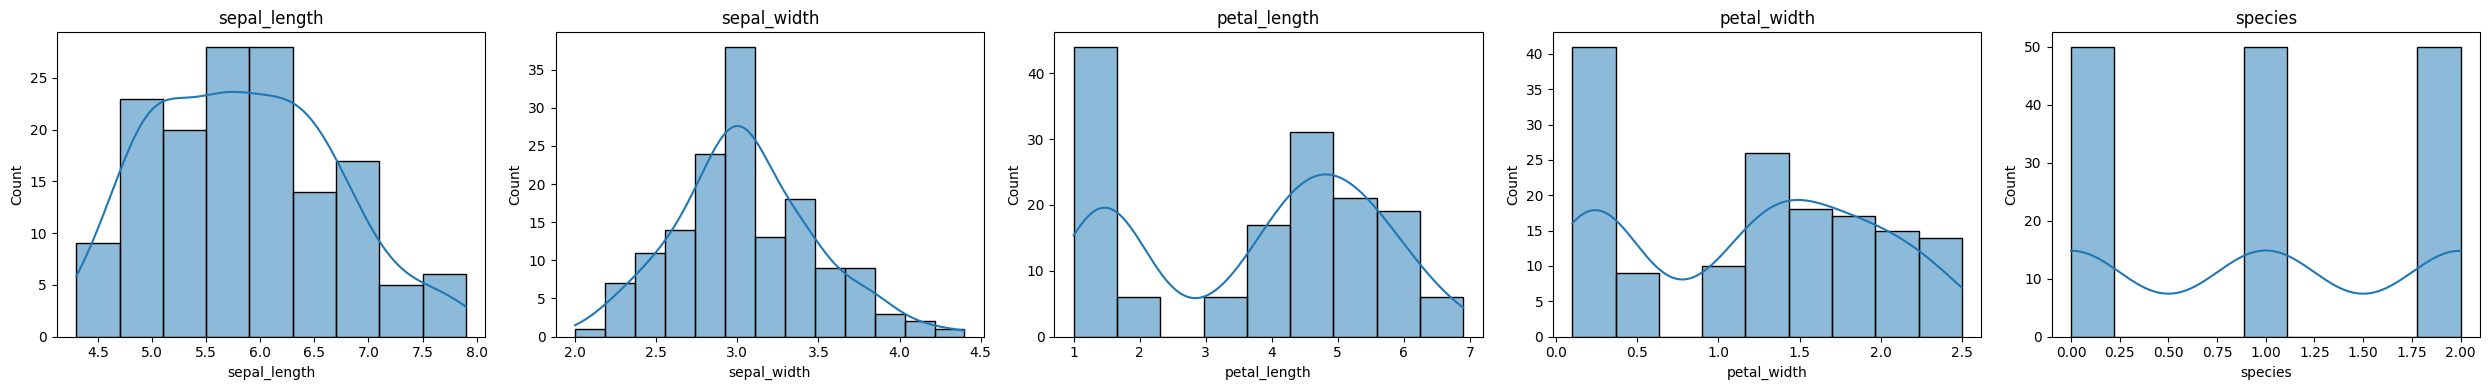

In [ ]:
plotPerColumnDistribution(df, n_cols=5)

###### Interpretación

* Grafico 1 - Distribución aproximadamente normal pero con ligera asimetría hacia la derecha mayoria de valores entre 5 y 7 cm
* Grafico 2 - Distribución más dispersa y algo sesgada a la izquierda (asimétrica)
* Grafico 3 - Tiene dos picos claros con largo de petalos de valores entre 1 y 2 cm o valores entre 4 y 5 cm
* Grafico 4 - Un grupo con valores cercanos a 0.2 cm y otro entre 1 y 2 cm. Esta variable podría ser muy útil para clasificar especies.
* Grafico 5 - Tres barras de igual altura, lo que indica que hay igual cantidad de muestras para cada especie: Iris-setosa - Iris-versicolor - Iris-virginica

###### 🔍Conclusión

* Las variables de pétalos (longitud y ancho) muestran claras diferencias entre especies, y son probablemente las más útiles para clasificarlas.
* Las variables de sépalos son menos discriminantes, aunque aún útiles.
* El conjunto de datos está balanceado con 150 observaciones en total (50 por especie).

##### Gráfico de Dispersión

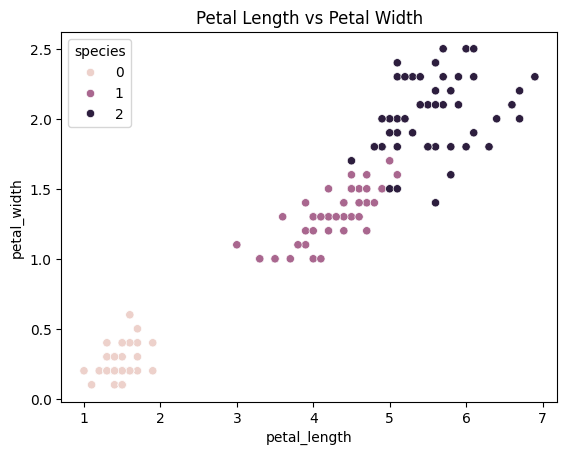

In [ ]:
sns.scatterplot(data=df, x="petal_length", y="petal_width", hue="species" )
plt.title("Petal Length vs Petal Width")
plt.show()

###### 📊 Ejes del gráfico



* Eje X (horizontal): Largo del pétalo (petal_length)
* Eje Y (vertical): Ancho del pétalo (petal_width)

###### 🌸 Especies representadas

1.   Iris-setosa (puntos azules):
  *	Se agrupan en la esquina inferior izquierda del gráfico.
  *	Esto indica que tienen pétalos más cortos y más estrechos.
  *	Muy poca superposición con las otras especies, lo que sugiere que es fácilmente distinguible por estas medidas.
2.   Iris-versicolor (puntos naranjas):
  *	Distribuidos en una zona intermedia del gráfico.
  *	Tienen pétalos de tamaño medio tanto en largo como en ancho.
  *	Hay cierta superposición con Iris-virginica, lo que puede dificultar su separación clara solo con estas dos variables.
3.   Iris-virginica (puntos verdes):
  *	Se encuentran más hacia la derecha y arriba.
  *	Presentan los pétalos más largos y anchos de las tres especies.
  *	También hay cierta dispersión, pero en general se distinguen por sus mayores dimensiones.

###### 🔍 Observaciones Clave

*	Existe una clara separación entre Iris-setosa y las otras dos especies.
*	Iris-versicolor y Iris-virginica tienen una zona de solapamiento, lo que podría requerir variables adicionales para una clasificación más precisa.
*	La relación entre largo y ancho del pétalo parece ser positiva: a mayor largo, mayor ancho.

##### Gráfico de Regresión

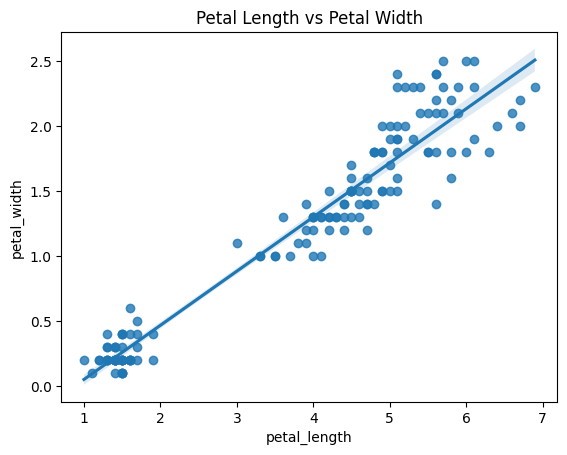

In [ ]:
sns.regplot(x="petal_length", y="petal_width", data=df)
plt.title("Petal Length vs Petal Width")
plt.show()

###### 📊 Características del gráfico

* Eje X: Largo del pétalo (rango: 1 a 7 cm)
* Eje Y: Ancho del pétalo (rango: 0.0 a 2.5 cm)
* Puntos azules: Representan observaciones individuales (flores).
* Línea azul: Línea de tendencia lineal (regresión).
* Banda sombreada: Intervalo de confianza alrededor de la línea de regresión.

###### 🔍 Análisis de la correlación

* Se observa una correlación positiva clara: a medida que aumenta el largo del pétalo, también lo hace el ancho.
*La línea de regresión indica que esta relación es aproximadamente lineal.
La banda de confianza sugiere que la predicción del ancho del pétalo a partir del largo es bastante precisa, especialmente en el rango medio de los datos.

###### 🧬 Sobre las especies

Aunque el gráfico no distingue visualmente entre especies (todos los puntos son azules), sabemos por el contexto que se trata de las tres especies de Iris:
* Iris-setosa probablemente se agrupa en la parte inferior izquierda (pétalos más pequeños).
* Iris-versicolor y Iris-virginica se extienden hacia la parte superior derecha (pétalos más grandes).


### 3 - Datos faltantes y/o Valores Atípicos (Outliers)

#### A continuación se evalua las columnas con datos faltantes y se determinó que los datasets no tiene valores nulos, por lo tanto no se realiza la eliminación de filas o columnas.

In [ ]:
missing_columns=df.isnull().sum()
print("df dataset")
print(missing_columns[missing_columns>0])
print()

df dataset
Series([], dtype: int64)



In [ ]:
df.isna().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


#### Genero datos Nulos para hacer una prueba de imputación

In [ ]:
data_na = df.copy()

for col in data_na.columns:
    data_na.loc[data_na.sample(frac=0.1).index, col] = np.nan

data_na.isna().sum()

,0
sepal_length,15
sepal_width,15
petal_length,15
petal_width,15
species,15


#### A continuación realizamos una imputación Univariante en Sklearn

En el código usamos 'most_frequent' (la moda), que es una opción común para variables categóricas o numéricas con distribuciones sesgadas.

In [ ]:
mode_imputer = SimpleImputer(strategy = 'most_frequent')

for column in data_na.columns:
    values = data_na[column].values.reshape(-1,1)
    mode_imputer.fit(values)
    data_na[column] = mode_imputer.transform(values)

data_na.isna().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


# Entrega 2 - Implementación de Modelos

## 2. Aplicación del Modelo de Clasificación:

### a) Preprocesamiento de datos

---

In [12]:
# 2. Preprocesamiento de datos
X = df.drop(columns=['species'])
y = df['species']

### b) División del conjunto de datos

---

In [13]:
# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### c) Aplicacion del modelo de clasificación y entrenamiento del modelo

---



En este punto, creamos el Modelo "Random Forest Classifier", lo entrenamos con los datos de entrenamiento ajustados mediante la normalización.

In [14]:
#c.1) Normalización
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
#c.2) Entrenamiento del modelo
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

### d) Evaluar el rendimiento del modelo utilizando métricas apropiadas.

---

In [15]:
# 4. Evaluación del modelo en el conjunto de prueba que nunca ha visto antes
y_pred = clf.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9666666666666667

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      1.00      0.95         9
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



### **Análisis de los Resultados Obtenidos**:

**Accuracy (Exactitud)**: `Accuracy: 0.9666666666666667`
* **¿Qué es?** La exactitud es la métrica más simple. Mide el porcentaje de predicciones que el modelo hizo correctamente sobre el total de predicciones.
* **Nuestro resultado**: Un `0.967` (redondeando) significa que el 96.7% de las flores en nuestro conjunto de prueba fueron clasificadas correctamente. Este es un valor muy alto y es la primera señal de que nuestro modelo es muy bueno.

**Classificación Report (Reporte de Clasificación)**

Este reporte nos da una visión mucho más profunda de cómo se comportó el modelo para cada una de las clases. En el dataset de Iris, las clases suelen ser:
* **Clase 0**: Iris Setosa
* **Clase 1**: Iris Versicolor
* **Clase 2**: Iris Virginica

<u>**Analisis de las columnas**:</u>

* **Precision (Precisión)**: De todas las veces que el modelo predijo una clase, ¿qué porcentaje de esas predicciones fue correcto?. Ejemplo: Si el modelo predijo "Clase 1" 10 veces, y en 9 de esas veces realmente era "Clase 1", la precisión es del 90% (0.90).
* **Recall (Exhaustividad o Sensibilidad)**: De todas las instancias que realmente pertenecían a una clase, ¿qué porcentaje logró "encontrar" el modelo?. Por ejemplo, si había 9 flores de "Clase 1" en los datos, y el modelo identificó correctamente las 9, el recall es del 100% (1.00).
* **F1-Score**: Es una media armónica entre la precisión y el recall. Es útil para tener una sola métrica que combine ambas. Un F1-Score alto indica que tanto la precisión como el recall son altos. Para nuestro caso, en las 3 clases, el f1-score es alto.
* **Support (Soporte)**: Es simplemente el número de muestras reales de cada clase en tu conjunto de datos de prueba. En nuestro caso, teníamos 10 flores de la clase 0, 9 de la clase 1 y 11 de la clase 2.

<u>**Análisis por Clase**:</u>
* **Clase 0 (Setosa)**:
  * `precisión: 1.00`, `recall: 1.00`, `f1-score: 1.00`
  * **Significado**: ¡Rendimiento perfecto! El modelo nunca se equivocó con esta clase. Todas las que predijo como Setosa eran Setosa. y encontró todas las Setosa que había. Esto es común, ya que la Setosa suele ser muy fácil de distinguir de las otras dos.
* **Case 1 (Versicolor)**:
  * `precisión: 0.90`, `recall: 1.00`, `f1-score: 0.95`
  * **Significado**: Aquí está el único error del modelo.
    * `recall: 1.00`. El modelo encontró todas las flores que eran realmente Versicolor. No se le escapó ninguna.
    * `precisión: 0.90`: Cuando el modelo dijo "esto es Versicolor", se equivocó el 10% de las veces. Esto significa que probablemente clasificó una flor de otra clase (casi seguro una Virgínica) como si fuera Versicolor.
* **Clase 2 (Virginica)**:
  * `precisión: 1.0`, `recall: 0.91`, `f1-score: 0.95`
  * **Significado**: Este es el otro lado de la moneda del error anterior.
    * `precisión: 1.00`: Cuando el modelo dijo "esto es Virgínica", siempre acertó.
    * `recall: 0.91:` El modelo no pudo encontrar el 9% de las flores que eran realmente Virginica (probablemente 1 de las 11). ¿Por qué? Porque, como vimos en la clase anterior, la clasificó erróneamente como Versicolor.

### **Conclusión Final**

El modelo de RandomForestClassifier es altamente efectivo. Su exactitud global es de casi el 97%.

Su único punto de confusión, que es muy pequeño, es que a veces confunde una flor de Iris Virgínica (clase 2) y la etiqueta como si fuera una Iris Versicolor (clase 1). Sin embargo, nunca comete el error opuesto (llamar a una Versicolor, Virgínica) y es perfecto para identificar la Iris Setosa.

Estos son resultados excelentes para este problema clásico.

### e) Ajuste y optimización de los parámetros del Modelo para mejorar su rendimiento

---

In [16]:
# 5. Optimización de hiperparámetros
grid_params = {
    'n_estimators': [50, 100, 150], # cantidad de arboles que se construiran dentro del bosque, se prueba 50, 100 y 150
    'max_depth': [None, 10, 20], # profundidad maxima que puede alcanzar cada arbol
    'min_samples_split': [2, 5, 10] # minimo de muestras que debe tener un nodo. tecnica para controla el sobreajust
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), grid_params, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)
print("\nMejores hiperparámetros:", grid_search.best_params_)


Mejores hiperparámetros: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}


Analicemos qué significa cada uno de estos "mejores hiperparámetros":

`'n_estimators': 50`
* **¿Qué es?** Es la cantidad de árboles de decisión que se construirán dentro del "bosque" (el `RandomForest`).
* **Nuestro resultado**: La búsqueda (`GridSearchCV`) probó construir bosques con 50, 100 y 150 árboles. Descubrió que **con 50 árboles era suficiente para alcanzar el máximo rendimiento**. Añadir más árboles (100 o 150) no mejoró la exactitud de forma significativa en las pruebas de validación cruzada, por lo que se considera que 50 es el número óptimo en términos de balance entre rendimiento y coste computacional.

`'max_depth': None`
* **¿Qué es?** Es la profundidad máxima que puede alcanzar cada árbol individual en el bosque. Controla cuán complejas pueden ser las reglas que aprende cada árbol.
* **Nuestro resultado**: La búsqueda probó con árboles limitados a una profundidad de 10 y 20, y también con `None` (sin límite). El resultado `None` significa que **la mejor estrategia fue dejar que los árboles crecieran tan profundo como fuera necesario** hasta que las hojas fueran "puras" (conteniendo muestras de una sola clase) o hasta que se activara otro criterio de parada como `min_samples_split`. Para un problema como el del dataset Iris, que es relativamente sencillo, no es raro que permitir árboles complejos funcione bien.

`'min_samples_split': 5`
* **¿Qué es?** Es el número mínimo de muestras que debe tener un "nodo" (una bifurcación) en un árbol para que se le permita dividirse en dos ramas más. Es una técnica para controlar el sobreajuste (overfitting).
* **Nuestro resultado**: La búsqueda probó con los valores 2, 5 y 10.
  * Un valor bajo como 2 permite que el árbol cree divisiones muy específicas, incluso si se basan en muy pocos datos, lo que puede llevar a sobreajuste.
  * Un valor alto como 10 puede ser demasiado restrictivo.
  * El buscador determinó que **requerir un mínimo de 5 muestras para crear una nueva división era el punto óptimo**. Esto ayuda a que el modelo sea un poco más general y no se ajuste demasiado a los detalles específicos (posiblemente ruido) del conjunto de entrenamiento.

**En Resumen**

La `GridSearchCV` ha determinado que, para el conjunto de datos, el modelo ideal es un bosque de 50 árboles, donde a cada árbol se le permite crecer sin límite de profundidad, pero con la condición de que solo puede dividir sus ramas si tiene al menos 5 muestras para analizar.

**Próximos Pasos**

¿Qué hacer ahora con esta información? A continuación usamos la "receta ganadora" para entrenar el modelo final y ver si su rendimiento en el conjunto de prueba (`X_test`) ha mejorado.

In [19]:
# 1. Crear una nueva instancia del clasificador con los mejores hiperparámetros
optimized_rf = RandomForestClassifier(
    n_estimators=50,
    max_depth=None,
    min_samples_split=5,
    random_state=42  # Es buena práctica mantener el random_state para resultados reproducibles
)

# 2. Entrenar este nuevo modelo optimizado con TODOS tus datos de entrenamiento
optimized_rf.fit(X_train_scaled, y_train)

# 3. Evaluar el modelo final en el conjunto de prueba que nunca ha visto antes
y_pred_optimized = optimized_rf.predict(X_test_scaled)

# 4. Imprimir el nuevo reporte de clasificación y la exactitud para ver si mejoró
print("Accuracy del modelo optimizado:", accuracy_score(y_test, y_pred_optimized))
print("\nReporte de clasificación del modelo optimizado:")
print(classification_report(y_test, y_pred_optimized))

Accuracy del modelo optimizado: 0.9666666666666667

Reporte de clasificación del modelo optimizado:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      1.00      0.95         9
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



### Prueba del Modelo

---
A continuación generamos datos para un tipo de Flor, la cual la pasamos al Grid que llama al Modelo con los mejores hiperparámetros, es decir, la receta ganadora, para que prediga el tipo de Flor, dando como Resultado que se trata de una Setosa.

In [17]:
# 6. Predicción con nuevos datos
new_data = np.array([[5.1, 3.5, 1.4, 0.2]])  # Ejemplo de flor


# Convertir new_data para que tenga las mismas columnas que X_train
new_data_df = pd.DataFrame(new_data, columns=X_train.columns)

new_data_scaled = scaler.transform(new_data_df)
# grid_search.best_estimator_: llama al mejor Modelo que GridSearchCV encontró durante
# la fase de optimización. Es el que tiene la combinación de hiperparámetros ganadora
# (n_estimators=50, min_samples_split=5,...)
prediction_label = grid_search.best_estimator_.predict(new_data_scaled) # guarda la prediccion

# Assuming predict returns the string label directly
prediction = prediction_label[0]

if prediction == 0:
    prediction = 'setosa'
elif prediction == 1:
    prediction = 'versicolor'
else:
    prediction = 'virginica'

print("\nPredicción para nuevo dato:", prediction)


Predicción para nuevo dato: setosa
